# Ordinary Differential Equations Exercise 1

## Imports

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

## Euler's method

[Euler's method](http://en.wikipedia.org/wiki/Euler_method) is the simplest numerical approach for solving a first order ODE numerically. Given the differential equation

$$ \frac{dy}{dx} = f(y(x), x) $$

with the initial condition:

$$ y(x_0)=y_0 $$

Euler's method performs updates using the equations:

$$ y_{n+1} = y_n + h f(y_n,x_n) $$

$$ h = x_{n+1} - x_n $$

Write a function `solve_euler` that implements the Euler method for a 1d ODE and follows the specification described in the docstring:

In [89]:
def solve_euler(derivs, y0, x):
    """Solve a 1d ODE using Euler's method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where
        y and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """
    y = np.zeros(len(x))
    y[0] = y0
    h = (x[1]-x[0])
    for a in range(1,len(x)):
        y[a]=y[a-1]+h*derivs(y[a-1],x[a-1])
    return y
    
    
    

In [90]:
assert np.allclose(solve_euler(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

The [midpoint method]() is another numerical method for solving the above differential equation. In general it is more accurate than the Euler method. It uses the update equation:

$$ y_{n+1} = y_n + h f\left(y_n+\frac{h}{2}f(y_n,x_n),x_n+\frac{h}{2}\right) $$

Write a function `solve_midpoint` that implements the midpoint method for a 1d ODE and follows the specification described in the docstring:

In [91]:
def solve_midpoint(derivs, y0, x):
    """Solve a 1d ODE using the Midpoint method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where y
        and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """
    y = np.zeros(len(x))
    y[0] = y0
    for a in range(1,len(x)):
        h = x[a]-x[a-1]
        y[a]=y[a-1]+h*derivs(y[a-1]+(h/2)*derivs(y[a-1],x[a-1]),x[a-1]+(h/2))
    return y

In [92]:
assert np.allclose(solve_midpoint(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

You are now going to solve the following differential equation:

$$
\frac{dy}{dx} = x + 2y
$$

which has the analytical solution:

$$
y(x) = 0.25 e^{2x} - 0.5 x - 0.25
$$

First, write a `solve_exact` function that compute the exact solution and follows the specification described in the docstring:

In [93]:
def solve_exact(x):
    """compute the exact solution to dy/dx = x + 2y.
    
    Parameters
    ----------
    x : np.ndarray
        Array of x values to compute the solution at.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions at y[i] = y(x[i]).
    """
    y = (.25)*np.exp(2*x) - (.5*x)-(.25)
    return y

In [94]:
assert np.allclose(solve_exact(np.array([0,1,2])),np.array([0., 1.09726402, 12.39953751]))

In the following cell you are going to solve the above ODE using four different algorithms:

1. Euler's method
2. Midpoint method
3. `odeint`
4. Exact

Here are the details:

* Generate an array of x values with $N=11$ points over the interval $[0,1]$ ($h=0.1$).
* Define the `derivs` function for the above differential equation.
* Using the `solve_euler`, `solve_midpoint`, `odeint` and `solve_exact` functions to compute
  the solutions using the 4 approaches.

Visualize the solutions on a sigle figure with two subplots:

1. Plot the $y(x)$ versus $x$ for each of the 4 approaches.
2. Plot $\left|y(x)-y_{exact}(x)\right|$ versus $x$ for each of the 3 numerical approaches.

Your visualization should have legends, labeled axes, titles and be customized for beauty and effectiveness.

While your final plot will use $N=10$ points, first try making $N$ larger and smaller to see how that affects the errors of the different approaches.

In [95]:
x = np.linspace(0,1,11)
def derivs(y,x):
    return x + 2*y
    

In [96]:
y1 = solve_euler(derivs, 0, x)
y2 = solve_midpoint(derivs, 0, x)
y3 = odeint(derivs,0,x)
y4 = solve_exact(x)

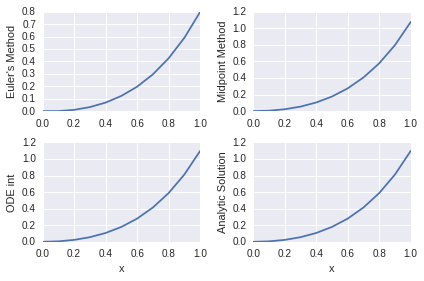

In [97]:
plt.subplot(2,2,1) # 2 rows x 1 col, plot 1
plt.plot(x,y1) 
plt.ylabel('Euler\'s Method')

plt.subplot(2,2,2) 
plt.plot(x,y2) 
plt.ylabel('Midpoint Method')

plt.subplot(2,2,3) 
plt.plot(x,y3) 
plt.ylabel('ODE int')
plt.xlabel('x')

plt.subplot(2,2,4) 
plt.plot(x,y4) 
plt.ylabel('Analytic Solution')
plt.xlabel('x')

plt.tight_layout()

In [98]:
why3 = []
for a in y3:
    why3.append(a[0])
    

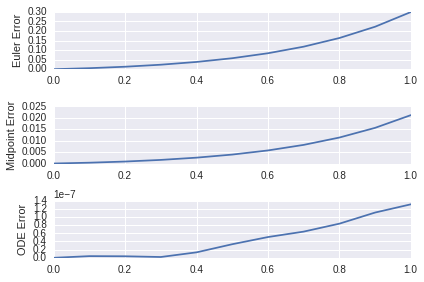

In [99]:
plt.subplot(3,1,1) 
plt.plot(x,np.abs(y1-y4)) 
plt.ylabel('Euler Error')

plt.subplot(3,1,2) 
plt.plot(x,np.abs(y2-y4)) 
plt.ylabel('Midpoint Error')

plt.subplot(3,1,3) 
plt.plot(x,np.abs(why3-y4)) 
plt.ylabel('ODE Error')


plt.tight_layout()

In [100]:
assert True # leave this for grading the plots